# ACCURACY EVALUATION METRICS

Evaluating a model is an essential part of building an effective machine learning model.
There are several evaluation metrics discussed in this notebook, namely confusion matrix, AUC-ROC curve, Mean Absolute Error and Root Mean Square Error.
Different evaluation metrics are used for different kinds of problems

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading data
data = pd.read_csv('../input/bank-note-authentication-uci-data/BankNote_Authentication.csv')
data.head(5)

Data Set Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. 

Attribute Information:
1. variance of Wavelet Transformed image 
2. skewness of Wavelet Transformed image
3. curtosis of Wavelet Transformed image 
4. entropy of image
5. class (integer)

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error

In [ ]:
#function for plotting confusion_matrix
def plot_confusion_matrix(predict_y,test_y):
    C = confusion_matrix(test_y, predict_y)
    labels = ['Authentic','Not Authentic']
    plt.figure(figsize=(10,7))
    sns.heatmap(C, annot=True, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
#function for plotting roc curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
features=['variance','skewness','curtosis','entropy']
X=data[features]
y=data['class']
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
# Specify Model
model = DecisionTreeClassifier(random_state=1)
# Fit Model
model.fit(train_X, train_y)

In [ ]:
# Make validation predictions
val_predictions = model.predict(val_X)

## ROC AUC SCORE

ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 

In [ ]:
#calculate roc auc score
auc = roc_auc_score(val_y, val_predictions)
print('AUC: ')
print(auc)

The higher the AUC score, the better is the performance.
Here, it is 0.99 which means that the prediction is almost perfect.

## ROC CURVE

In [ ]:
fpr, tpr, thresholds = roc_curve(val_y, val_predictions)

In [ ]:
plot_roc_curve(fpr, tpr)

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
The above curve implies that the prediction is very accurate as there are very less values that are predicted incorrectly.

## CONFUSION MATRIX

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us an idea of how well our classification model is performing and what kinds of errors it is making.

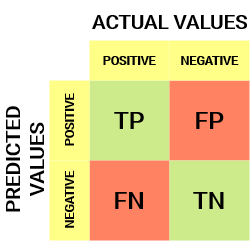

True Positive (TP)

    The actual value was positive and the model predicted a positive value


True Negative (TN)  


    The actual value was negative and the model predicted a negative value


False Positive (FP) – Type 1 error


    The actual value was negative but the model predicted a positive value


False Negative (FN) – Type 2 error

    The actual value was positive but the model predicted a negative value

In [ ]:
plot_confusion_matrix(val_predictions,val_y)

The confusion matrix shows that:

1. There are 190 values that are AUTHENTIC originally, and are predicted AUTHENTIC.
2. There are 3 values that are AUTHENTIC actually, but are predicted NOT AUTHENTIC.
3. There are no values that are NON AUTHENTIC which are predicted NON AUTHENTIC.
4. There are 150 values which are NOT AUTHENTIC and are predicted NON AUTHENTIC.

## MEAN ABSOLUTE ERROR

MAE is the absolute difference between the target value and the value predicted by the model. 
MAE is a linear score i.e. all the individual differences are weighted equally. It is not appropriate when the outliers are important.

In [ ]:
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: ")
print(val_mae)

## ROOT MEAN SQUARE ERROR

RMSE is the most widely used metric for regression tasks. It is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.

In [ ]:
val_rmse = mean_squared_error(val_predictions, val_y, squared = False)
print("Validation RMSE: ")
print(val_rmse)